In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('concated_edgi.csv')

In [57]:
df['E-Government Index'] = df['E-Government Index'].apply(lambda x: x * 100.0)
df['E-Participation Index'] = df['E-Participation Index'].apply(lambda x: x * 100.0)
df['Online Service Index'] = df['Online Service Index'].apply(lambda x: x * 100.0)
df['Human Capital Index'] = df['Human Capital Index'].apply(lambda x: x * 100.0)
df['Telecommunication Infrastructure Index'] = df['Telecommunication Infrastructure Index'].apply(lambda x: x * 100.0)

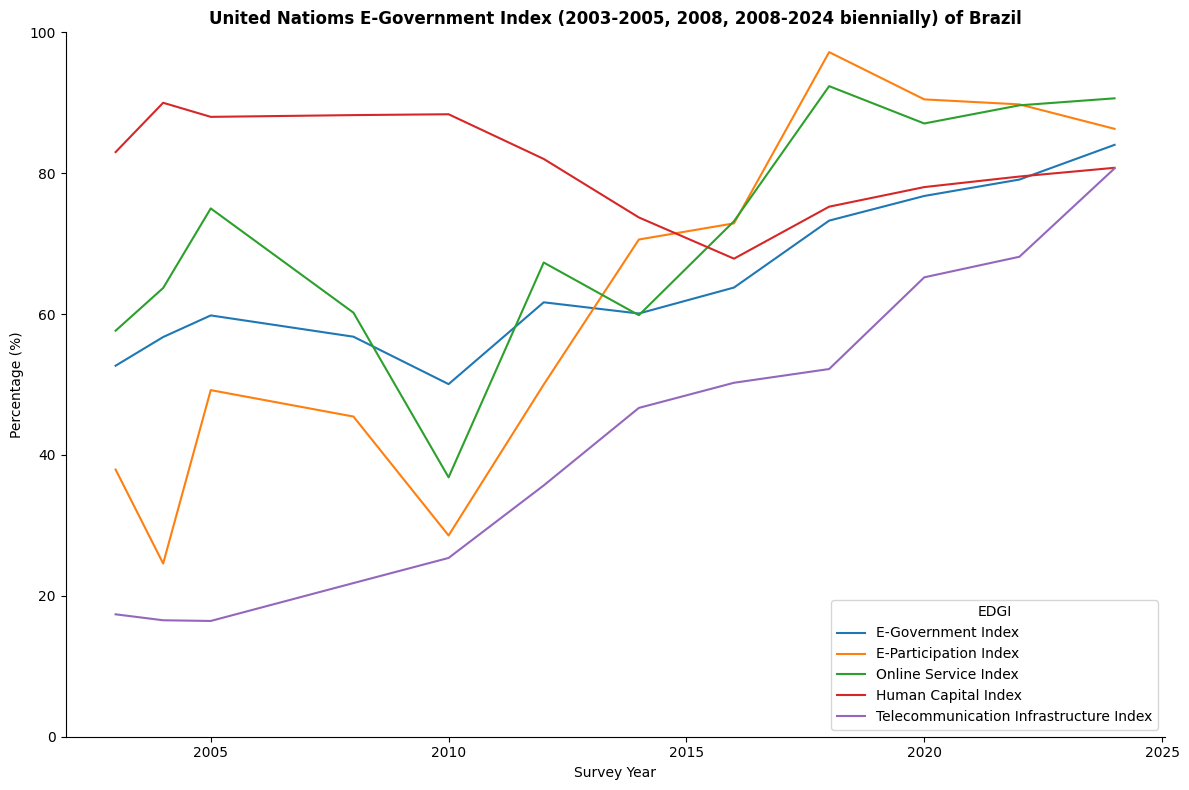

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=df, x='Survey Year', y='E-Government Index', label='E-Government Index')
sns.lineplot(data=df, x='Survey Year', y='E-Participation Index', label='E-Participation Index')
sns.lineplot(data=df, x='Survey Year', y='Online Service Index', label='Online Service Index')
sns.lineplot(data=df, x='Survey Year', y='Human Capital Index', label='Human Capital Index')
sns.lineplot(data=df, x='Survey Year', y='Telecommunication Infrastructure Index', label='Telecommunication Infrastructure Index')


sns.despine()
ax.set_title('United Natioms E-Government Index (2003-2005, 2008, 2008-2024 biennially) of Brazil', fontweight='bold')
ax.set_ylabel("Percentage (%)")
ax.set_ylim(0, 100)
ax.legend(title="EDGI")
plt.tight_layout()
plt.show()